In [1]:
import pandas as pd

In [2]:
?pd.read_csv

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file

markdown cells render like they're text

# can have headings, subheadings, lists

- like
- this 
- list


1. or
2. autonumbered
5. ones

> quotes can be led off email-style, by an arrow

and `monospace` works inline as well as broken off into code chunks:

```python
def convert_prices(string):
    return string.strip("$").replace(",", "")
```

And, $\\LaTeX$ works, too, both inline (e.g. $x^2 + 5x - 9$) and set off in equation-mode:

$$ \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{\frac{-1}{2\sigma^2}(y-\mu)'(y-\mu)\right\} $$

# First, we'll read in some pre-cleaned data from insideairbnb.org on New Orleans. 

In [3]:
listings = pd.read_csv('./data/listings.csv')

In [4]:
listings.head()

,Unnamed: 0,Unnamed: 0.1,listing_url,name,summary,space,description,host_id,host_response_time,host_response_rate,...,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,review_scores_rating,instant_bookable,reviews_per_month,square_feet_missing
0,0,0,https://www.airbnb.com/rooms/10291,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",31004,within an hour,100%,...,Entire home/apt,4,2.0,3,3.0,NaN,97.0,f,0.96,True
1,1,1,https://www.airbnb.com/rooms/19091,Fully Furnished Cozy Apartment,This cozy space is a wonder of post-Katrina re...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,This cozy space is a wonder of post-Katrina re...,72880,within an hour,100%,...,Entire home/apt,3,1.0,1,1.0,750.0,97.0,t,3.74,False
2,2,2,https://www.airbnb.com/rooms/26834,Maison Mandeville in the Marigny,NaN,Charming shotgun in the Marigny section of tow...,Charming shotgun in the Marigny section of tow...,114452,within a few hours,100%,...,Entire home/apt,2,1.0,1,1.0,NaN,99.0,f,2.10,True
3,3,3,https://www.airbnb.com/rooms/32250,Maisonette; Steps to St Charles Ave,The well-located maisonette (little house) fea...,Come visit our historic maisonette convenientl...,The well-located maisonette (little house) fea...,138383,within an hour,100%,...,Entire home/apt,2,1.0,1,1.0,NaN,98.0,f,4.49,True
4,4,4,https://www.airbnb.com/rooms/53173,MUST READ > 5 STAR REVIEWS JAZZ FEST ! BYW...,The Bywater is the new hot and happening neigh...,This is a VERY large bedroom - boasting queen ...,The Bywater is the new hot and happening neigh...,12154,within an hour,100%,...,Private room,2,2.0,1,1.0,NaN,98.0,f,1.36,True


In [5]:
listings.price.hist()

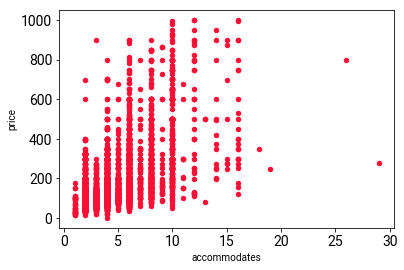

In [6]:
listings.plot.scatter('accommodates', 'price')

In [7]:
listings['square_feet_missing'] = listings.square_feet.isnull()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc390477320>,
      dtype=object)

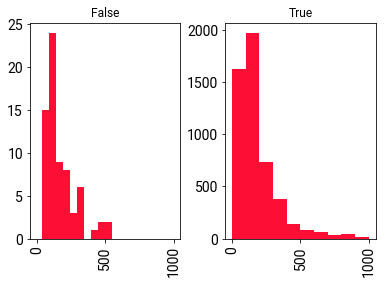

In [8]:
listings.hist('price',by='square_feet_missing', sharex=True)

square_feet_missing
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

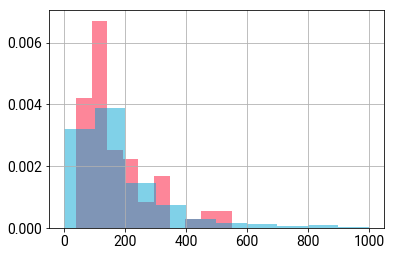

In [9]:
listings.groupby("square_feet_missing").price.hist(density=True,alpha=.5)

In [10]:
listings.groupby("neighborhood").price.agg(['count','mean','std'])\
                                .sort_values('count',ascending=False)

,count,mean,std
neighborhood,,,
Central Business District,716,216.635475,148.413945
Seventh Ward,339,172.306785,150.993300
Central City,324,171.475309,138.958742
Treme - Lafitte,322,196.906832,173.989698
Marigny,303,212.026403,155.346246
Mid-City,302,166.629139,146.043939
Lower Garden District,220,195.181818,158.781041
St. Claude,211,127.957346,90.044238
Bywater,203,169.098522,125.419771


What if we wanted to know how many neighborhoods have more than 50 listings? 

In [11]:
neighborhoods = listings.groupby("neighborhood")
(neighborhoods.price.count() > 50)

neighborhood
Algiers Point                 True
Audubon                       True
Bayou St. John                True
Behrman                      False
Black Pearl                  False
Broadmoor                     True
Bywater                       True
Central Business District     True
Central City                  True
City Park                     True
Desire Area                  False
Dillard                      False
Dixon                        False
East Carrollton               True
East Riverside                True
Fairgrounds                   True
Fillmore                     False
Florida Area                 False
French Quarter                True
Freret                       False
Garden District              False
Gentilly Terrace              True
Gentilly Woods               False
Gert Town                    False
Hollygrove                   False
Holy Cross                   False
Iberville                    False
Irish Channel                 True
Lake Ca

In [12]:
(neighborhoods.price.count() > 50).sum()

28

[Joris's course](https://github.com/jorisvandenbossche/DS-python-data-analysis)

# Working with spatial data

In [13]:
import geopandas as gpd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx

In [14]:
listings.price.head()

0    300.0
1    100.0
2    115.0
3    140.0
4    115.0
Name: price, dtype: float64

In [15]:
listings.price.apply(np.log).head()

0    5.703782
1    4.605170
2    4.744932
3    4.941642
4    4.744932
Name: price, dtype: float64

In [16]:
listings[['longitude', 'latitude']].head()

,longitude,latitude
0,-90.109282,29.986663
1,-90.118770,29.962566
2,-90.055313,29.965568
3,-90.084032,29.933655
4,-90.039057,29.964832


In [17]:
listings[['longitude', 'latitude']].apply(shp.Point).head()

longitude    POINT Z (-90.10928208440596 -90.11876977912294 0)
latitude        POINT Z (29.98666321152104 29.9625656335813 0)
dtype: object

In [18]:
listings[['longitude', 'latitude']].apply(shp.Point, axis=1).head()

0    POINT (-90.10928208440596 29.98666321152104)
1     POINT (-90.11876977912294 29.9625656335813)
2    POINT (-90.05531293053234 29.96556807082061)
3     POINT (-90.0840317471018 29.93365480435372)
4    POINT (-90.03905718186577 29.96483236389307)
dtype: object

In [19]:
listings['geometry'] = listings[['longitude', 'latitude']].apply(shp.Point, axis=1)

In [20]:
listings = gpd.GeoDataFrame(listings)

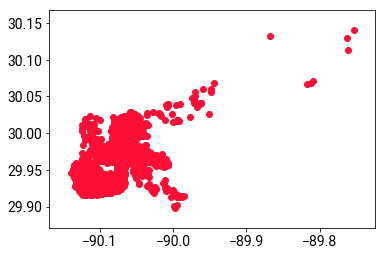

In [21]:
listings.plot()

In [22]:
listings.total_bounds

array([-90.13960066,  29.89826583, -89.75353898,  30.14003796])

In [23]:
listings.crs = {'init':'epsg:4326'}

In [24]:
west, south, east, north = listings.total_bounds

In [25]:
ctx.howmany(west, south, east, north, zoom=12, ll=True)

Using zoom level 12, this will download 20 tiles


20

In [26]:
image, bounds_webmerc = ctx.bounds2img(*listings.total_bounds, 
                                          zoom=12, ll=True )

In [27]:
basemap = rio.open('new_orleans.tif')
basemap_image = basemap.read()
basemap_image = basemap_image.transpose(1,2,0)

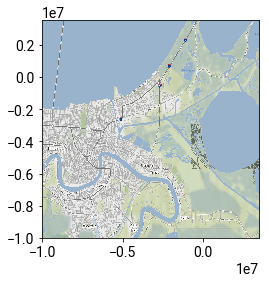

In [28]:
plt.imshow(basemap_image, extent=basemap.bounds)

In [29]:
import matplotlib.pyplot as plt

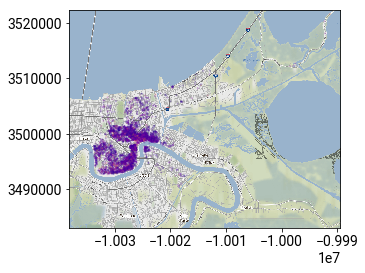

In [30]:
plt.imshow(image, extent=bounds_webmerc)
listings.to_crs(epsg=3857).plot('price',
                                ax=plt.gca(), alpha=.2,
                                cmap='plasma', s=1)

In [31]:
listings = listings.query('longitude < -89.99')

In [32]:
image, bounds_webmerc = ctx.bounds2img(*listings.total_bounds, 
                                          zoom=14, ll=True)

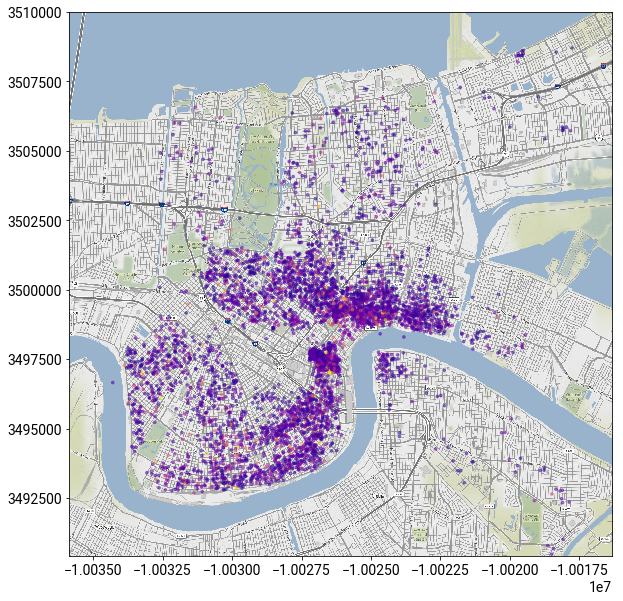

In [33]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image, extent=bounds_webmerc)
listings.to_crs(epsg=3857).plot('price',
                                ax=ax, alpha=.5,
                                cmap='plasma', s=7)

In [34]:
import sklearn.cluster as clust

In [35]:
dbscanned = clust.DBSCAN().fit(listings[['longitude', 'latitude']].values)

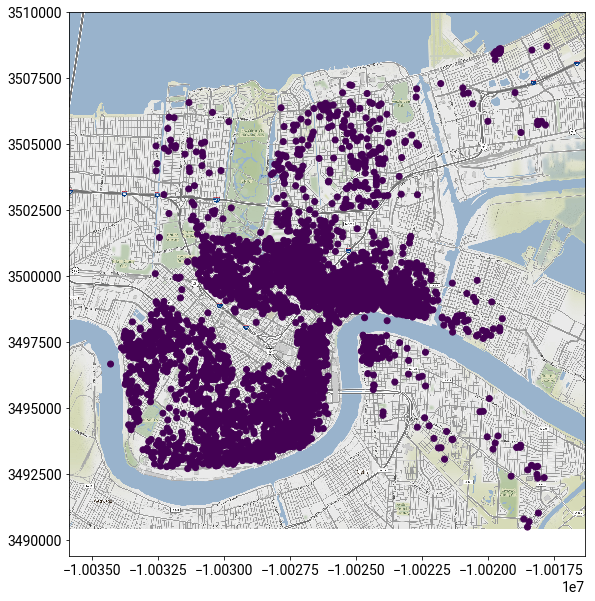

In [36]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image, extent=bounds_webmerc)

(listings.to_crs(epsg=3857)
         .assign(labels = dbscanned.labels_)
         .plot('labels', ax=ax))

Hmm... I wonder why. Let's look at the dbscan configuration and see why:

In [37]:
clust.DBSCAN?

Init signature: clust.DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, optional
    The maximum distance between two samples for them to be considered
    as in the same neighborhood.

min_samples : int, optional
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. This includes the point itself.

metric : string, or callable
    The metric to use when calculating distance between instances in a
    feature array. If metric is a string or callable, it must be one of
    the options allowed by metrics.pairw

Ah! epsilon must increase, since our data is too close together to let an epsilon of .5 (which would translate to a distance in .5 decimal degrees, which is around 30 miles at this latitude!

So, let's reduce that epsilon down to something more reasonable (e.g. $.0025$).

In [38]:
dbscanned = (clust.DBSCAN(eps=.0025)
                 .fit(listings[['longitude', 'latitude']].values))

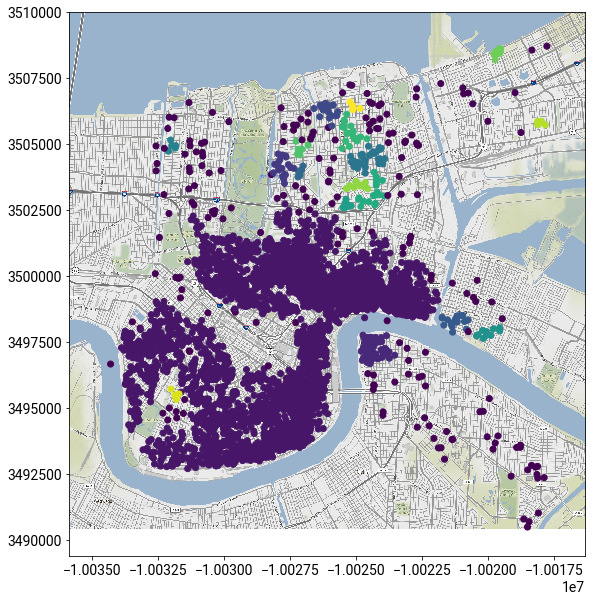

In [39]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image, extent=bounds_webmerc)

(listings.to_crs(epsg=3857)
         .assign(labels = dbscanned.labels_)
         .plot('labels', ax=ax))

Which still are considered "unclassified" by the algorithm?

In [40]:
unassigned = (listings.assign(labels = dbscanned.labels_)
                      .query('labels == -1')
             )

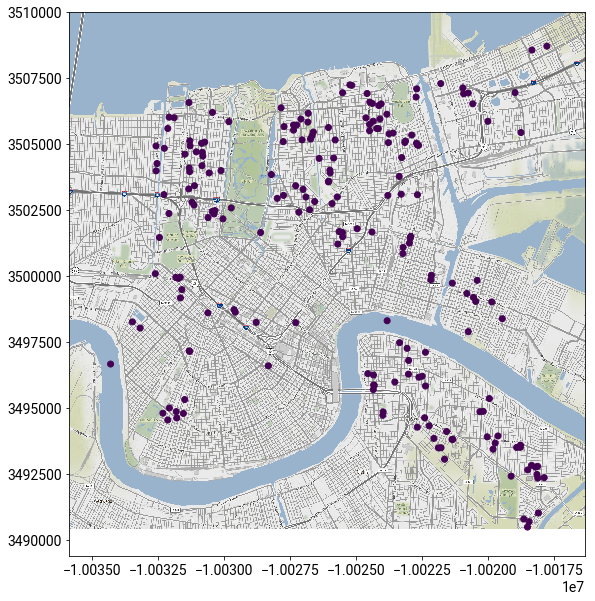

In [41]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image, extent=bounds_webmerc)

(unassigned.to_crs(epsg=3857)
           .plot('labels', ax=ax))

What if we'd like to mix in price? Well, note that the `DBSCAN` class can take what it calls a "precomputed affinity matrix," which is a matrix describing how similar places are in space. So, if we wanted to, we could compute this ourselves using both spatial information (say, using inverse distance weighting) and price similarity (using another kernel function). 

In [42]:
import pysal as ps

In [43]:
spatial = ps.weights.Kernel.from_dataframe(listings, fixed=False, 
                                           function='gaussian', k=50)
spatial_matrix = spatial.sparse

In [44]:
spatial_matrix

<5132x5132 sparse matrix of type '<class 'numpy.float64'>'
	with 261732 stored elements in Compressed Sparse Row format>

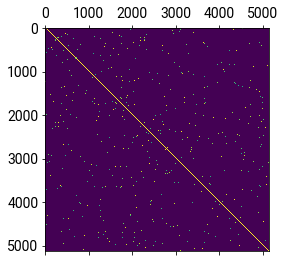

In [45]:
plt.matshow(spatial_matrix.toarray())

In [46]:
import sklearn.metrics as skm

In [47]:
skm.pairwise.kernel_metrics()

{'additive_chi2': <function sklearn.metrics.pairwise.additive_chi2_kernel(X, Y=None)>,
 'chi2': <function sklearn.metrics.pairwise.chi2_kernel(X, Y=None, gamma=1.0)>,
 'linear': <function sklearn.metrics.pairwise.linear_kernel(X, Y=None)>,
 'polynomial': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'poly': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'rbf': <function sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)>,
 'laplacian': <function sklearn.metrics.pairwise.laplacian_kernel(X, Y=None, gamma=None)>,
 'sigmoid': <function sklearn.metrics.pairwise.sigmoid_kernel(X, Y=None, gamma=None, coef0=1)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>}

In [48]:
prices_matrix = skm.pairwise.rbf_kernel(listings[['price']].values, gamma=.001)

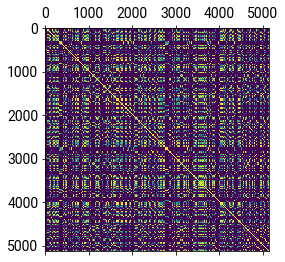

In [49]:
plt.matshow(prices_matrix)

In [50]:
joint = spatial_matrix.multiply(prices_matrix)

In [51]:
joint

<5132x5132 sparse matrix of type '<class 'numpy.float64'>'
	with 261732 stored elements in COOrdinate format>

In [52]:
dbscanned = (clust.DBSCAN(eps=.25).fit(joint))

In [53]:
cores = dbscanned.core_sample_indices_

In [54]:
coregeoms = listings.iloc[cores]

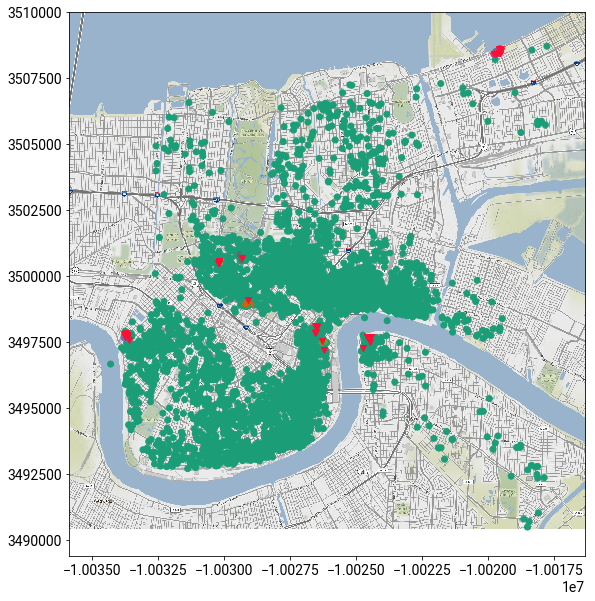

In [55]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image, extent=bounds_webmerc)

(listings.to_crs(epsg=3857)
         .assign(labels=dbscanned.labels_)
           .plot('labels', ax=ax, cmap='Dark2'))
coregeoms.to_crs(epsg=3857)\
         .plot(ax=ax, marker='v')